# Logistic Regression
`jskyzero` `2018/03/12`

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## 分类(Classification)

先从二元分类开始

> $y = \{0, 1\}$

阈值(threshold)分类，和阈值比较判断类别。

但是分类效果并不好。


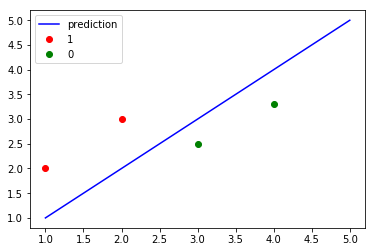

In [2]:
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
plt.plot(x, y, color='b', label="prediction")
plt.plot([1, 2], [2, 3], 'ro', color='r', label="1")
plt.plot([3, 4], [2.5, 3.3], 'ro', color='g', label="0")
plt.legend(loc="upper left")

## 映射

找一个映射到(0, 1)区间的假设

$h_\theta(x) = g(\theta^Tx)$

$g(z) = \frac{1}{1 + e^{-z}}$

得到的是个概率：$P(y = 0 \space |\space x; \theta)$

根据样本类别比例分配阈值。

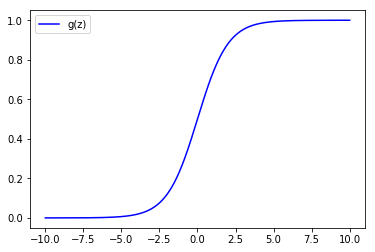

In [3]:
g = lambda x : 1 / (1 + (math.e ** (-x)))
x = np.linspace(-10, 10, 1000)
y = np.vectorize(g)(x)

plt.plot(x, y, color='b', label="g(z)")
plt.legend(loc="upper left")

## 非线性决策边界（Non-linear dicision boundaries）

$h_\theta(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3^2 + \theta_4 x_4^2 + ...)$

映射到一个高维空间

## 损耗函数（Cost Function）

导数先增后减，$h_\theta(x)$不是凸函数（函数导数单调递增）

$Cost(h_\theta(x), y) = -log(h_\theta(x)) \space if \space y = 1$ (y = 1 -> 0)

$Cost(h_\theta(x), y) = -log(1 - h_\theta(x)) \space if \space y = 0$ (y = 0 -> 0)

$J(\theta) = - \frac{1}{m}[\sum_{i=1}^{m}y^ilog(h_\theta(x^i)) + (1 - y^i)log(1 - h_\theta(x^i))]$

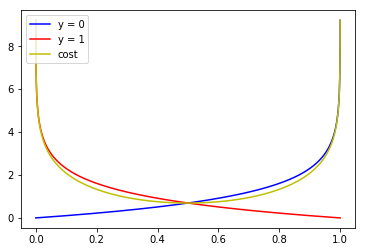

In [4]:
h = np.linspace(0, 1, 10000)[1:-1]

cost11 = lambda x : - math.log(1 - x)
cost12 = lambda x : - math.log(x)

## y = 1 - h(x)
cost = lambda x : - x * math.log(1 - x) - (1 - x) * (math.log(x))

y11 = np.vectorize(cost11)(h)
y12 = np.vectorize(cost12)(h)
y2 = np.vectorize(cost)(h)

plt.plot(h, y11, color='b', label="y = 0")
plt.plot(h, y12, color='r', label="y = 1")
plt.plot(h, y2, color='y', label="cost")
# (似乎重合了)
plt.legend(loc="upper left")

## 梯度下降

repeat until convergence {


$\theta_i = \theta_i - \alpha \frac{1}{m} \sum_{j = 1}^{m}((h_\theta(x^j) - y^j) * x_i^j)$


}

迭代式求解。


## 多类别分类

对每个类别进行一次逻辑回归，判断在哪个预测函数的值最大，$max_i \space h_\theta^i(x)$